<a href="https://colab.research.google.com/github/jsebastianbarretoj99/Asignatura_Inteligencia_Artificial_5607/blob/master/Tarea_Semana_03_y_04/RegresionLineal_BaseDatosOro_juan_barreto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gold Data!!! Forecasting

Student: Juan Sebastián Barreto Jimenez

In [2]:
# Imports of the necessary libraries are carried out
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Arreglo de datos

In [3]:
dataframeGold = pd.read_csv('gold_price_data.csv') # data from https://www.kaggle.com/arashnic/learn-time-series-forecasting-from-gold-price
print(dataframeGold.columns)
dataframeGold.describe()

Index(['Date', 'Value'], dtype='object')


,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


In [4]:
print(dataframeGold.dtypes)
dataframeGold.head(10)

Date      object
Value    float64
dtype: object


,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4
5,1971-04-01,38.9
6,1971-07-01,40.1
7,1971-10-01,42.0
8,1972-01-03,43.5
9,1972-04-03,48.3


In [5]:
etiqueta = np.array(dataframeGold['Value'])[2:]
car_m1 = np.array(dataframeGold['Value'])[1:-1]
car_m2 = np.array(dataframeGold['Value'])[:-2]
print(len(etiqueta))
print(len(car_m1))
print(len(car_m2))

10785
10785
10785


In [6]:
## Agrupando los datos en un único Dataframe y exportándolo a un archivo CSV
dataset = pd.DataFrame({'Carac menos 2':car_m2, 'Carac menos 1':car_m1, 'Etiqueta':etiqueta})
dataset.to_csv('goldPriceArranged.csv')
dataset['Carac menos 1']

0          35.10
1          35.40
2          36.20
3          37.40
4          38.90
          ...   
10780    1683.65
10781    1672.50
10782    1655.70
10783    1653.75
10784    1570.70
Name: Carac menos 1, Length: 10785, dtype: float64

In [7]:
## Pasando los datos a una matriz de tipo numpy
matrizDatos = dataset.to_numpy()
print(matrizDatos.shape)
print(matrizDatos)
print(matrizDatos[0][2])

(10785, 3)
[[  35.2    35.1    35.4 ]
 [  35.1    35.4    36.2 ]
 [  35.4    36.2    37.4 ]
 ...
 [1672.5  1655.7  1653.75]
 [1655.7  1653.75 1570.7 ]
 [1653.75 1570.7  1562.8 ]]
35.4


## Entrenamieno Regresión lineal

In [8]:
#   Function: hypothesis_gold() 
#   Purpose: Calculate the linear regression hypothesis for gold data-set
#   hypothesis: h(x) = theta_0*x0 + theta_1*x1
#   Argument:
#       theta_0: Parameter theta 0
#       theta_1: Parameter theta 1
#       x0: evaluated feature one
#       x1: evaluated feature two
#   Return:
#    features   hypothesis of lineal regression
def hypothesis_gold(theta_0, theta_1, x0, x1):
    return theta_0*x0 + theta_1*x1

In [9]:
#   Function: cost_gold() 
#   Purpose: Calculate cost function for gold data-set
#   Argument:
#       parameters: Array with parameters theta 0 and theta 1
#       features: Array with features of data-set
#       labels: Array with labels of data-set
#   Return:
#       Value of cost function
def cost_gold(parameters, features0, features1, labels):
    j = ((hypothesis_gold(parameters[0], parameters[1], features0, features1)-labels)**2)
    return np.sum(j)/(2*len(features0));

In [10]:
#   Function: grid_search_parameters_gold() 
#   Purpose: Calculate parameters theta 0 and theta 1 in grid search for gold data-set
#   Argument:
#       features0: Array with features one of data-set
#       features1: Array with features two of data-set
#       labels: Array with labels of data-set
#   Return:
#       Array with parameters theta 0 and theta 1
def grid_search_parameters_gold(features0, features1, labels):
    # Variable creation for calculate parameters theta 0 and theta 1 in grid search
    min_j, min_aux, theta_0_min, theta_1_min = 99999, 0, 0, 0
    for i in np.arange(-2,2,0.1):
        for j in np.arange(-2,2,0.1):
            min_aux = cost_gold(np.array([i, j]),features0, features1, labels)
            if(min_aux < min_j):
                min_j, theta_0_min, theta_1_min = min_aux, i, j
    return np.array([theta_0_min, theta_1_min])

In [11]:
# data 
features0 = dataset['Carac menos 2']
features1 = dataset['Carac menos 1']
labels = dataset['Etiqueta']

# Calculate parameters theta 0 and theta 1 in grid search
theta = grid_search_parameters_gold(features0, features1, labels)
# Theta 0 and theta 1 are displayed calculated
print("theta_0:", theta[0],"thetha_1:", theta[1], "Funcion de costo =",cost_gold(theta, features0, features1, labels))

theta_0: 1.7763568394002505e-15 thetha_1: 1.0000000000000027 Funcion de costo = 40.808982642558796


In [12]:
# Test the linea regression with theta 0 and theta 1 calculated
labels_estimator = np.array([]);

for i, j in zip(features0,features1):
    labels_estimator = np.append(labels_estimator, hypothesis_gold(theta[0], theta[1], i, j))

AttributeError: 'Axes3DSubplot' object has no attribute 'scater'

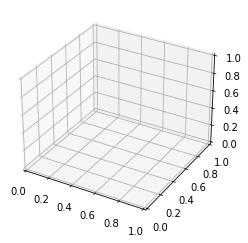

In [13]:
# Features are graphed with dataset labels and estimates
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(features0, features1, labels, label='Datos') # Plot labels vs features1 vs features0
ax.scatter(features0, features1, labels_estimator, label='Datos') # Plot labels_estimator vs features1 vs features0
plt.xlabel('Features 0: Features minus 2') # Set x label
plt.ylabel('Features 1: Features minus 1') # Set y label
plt.title('Lineal Regression: Gold value') # Set title
plt.show() # Show graph